# 랭체인(LangChain) 엔티티 추출(Entity Extraction) 예제
## Reference : https://python.langchain.com/docs/use_cases/extraction
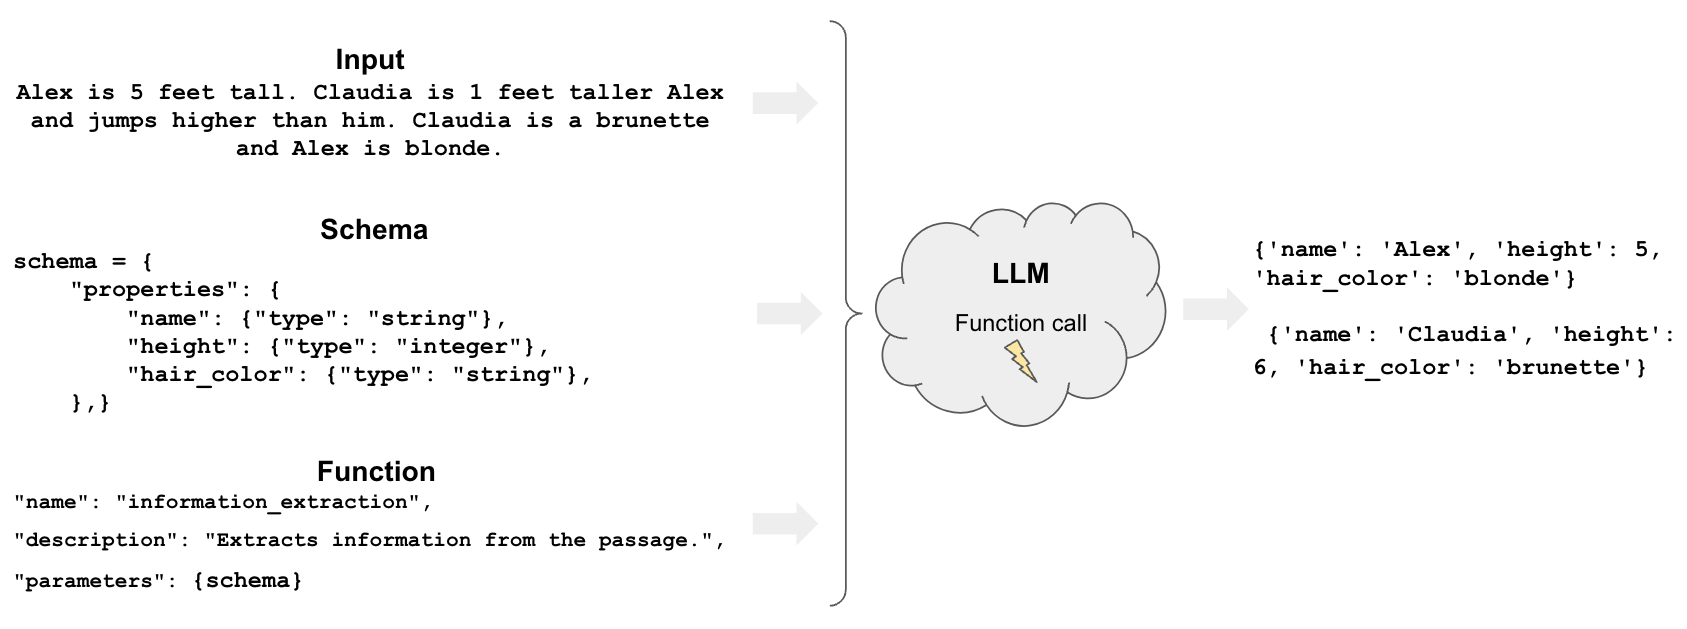

In [ ]:
!pip install langchain openai

## OpenAI API Key 설정

In [ ]:
OPENAI_KEY = "여러분의_OPENAI_API_KEY"

## Quickstart

In [ ]:
from langchain.chains import create_extraction_chain
from langchain.chat_models import ChatOpenAI

# 스키마(Schema) 설정
schema = {
    "properties": {
        "name": {"type": "string"},
        "height": {"type": "integer"},
        "hair_color": {"type": "string"},
    },
    "required": ["name", "height"],
}

# Input
inp = """알렉스는 키가 5피트입니다. 클라우디아는 알렉스보다 1피트 더 크고 그보다 더 높이 점프합니다. 클라우디아는 갈색 머리이고 알렉스는 금발입니다."""

# Run chain
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo", openai_api_key=OPENAI_KEY)
chain = create_extraction_chain(schema, llm)
chain.run(inp)

[{'name': '알렉스', 'height': 5, 'hair_color': '금발'},
 {'name': '클라우디아', 'height': 6, 'hair_color': '갈색'}]

## Multiple entity types

In [ ]:
schema = {
    "properties": {
        "person_name": {"type": "string"},
        "person_height": {"type": "integer"},
        "person_hair_color": {"type": "string"},
        "dog_name": {"type": "string"},
        "dog_breed": {"type": "string"},
    },
    "required": ["person_name", "person_height"],
}

chain = create_extraction_chain(schema, llm)

inp = """알렉스는 키가 5피트입니다. 클라우디아는 알렉스보다 1피트 더 크고 그보다 더 높이 점프합니다.
클라우디아는 갈색 머리이고 알렉스는 금발입니다. 알렉스의 개 프로스티는 래브라도 종이며 숨바꼭질 놀이를 좋아합니다."""

chain.run(inp)

[{'person_name': '알렉스',
  'person_height': 5,
  'person_hair_color': '금발',
  'dog_name': '프로스티',
  'dog_breed': '래브라도'},
 {'person_name': '클라우디아', 'person_height': 6, 'person_hair_color': '갈색'}]

## Unrelated entities

In [ ]:
schema = {
    "properties": {
        "person_name": {"type": "string"},
        "person_height": {"type": "integer"},
        "person_hair_color": {"type": "string"},
        "dog_name": {"type": "string"},
        "dog_breed": {"type": "string"},
    },
    "required": [],
}

chain = create_extraction_chain(schema, llm)

inp = """알렉스는 키가 5피트입니다. 클라우디아는 알렉스보다 1피트 더 크고 그보다 더 높이 점프합니다.
클라우디아는 갈색 머리이고 알렉스는 금발입니다. 윌로우는 다른 개들과 놀기를 좋아하는 독일 셰퍼드이며, 항상 근처에 사는 밀로라는 보더 콜리와 놀고 있는 것을 볼 수 있습니다."""

chain.run(inp)

[{'person_name': '알렉스',
  'person_height': 5,
  'person_hair_color': '금발',
  'dog_name': '윌로우',
  'dog_breed': '독일 셰퍼드'},
 {'person_name': '클라우디아', 'person_height': 6, 'person_hair_color': '갈색'},
 {'dog_name': '밀로', 'dog_breed': '보더 콜리'}]

## Extra information

In [ ]:
schema = {
    "properties": {
        "person_name": {"type": "string"},
        "person_height": {"type": "integer"},
        "person_hair_color": {"type": "string"},
        "dog_name": {"type": "string"},
        "dog_breed": {"type": "string"},
        "dog_extra_info": {"type": "string"},
    },
}

chain = create_extraction_chain(schema, llm)

inp = """알렉스는 키가 5피트입니다. 클라우디아는 알렉스보다 1피트 더 크고 그보다 더 높이 점프합니다.
클라우디아는 갈색 머리이고 알렉스는 금발입니다. 윌로우는 다른 개들과 놀기를 좋아하는 독일 셰퍼드이며, 항상 근처에 사는 밀로라는 보더 콜리와 놀고 있는 것을 볼 수 있습니다."""

chain.run(inp)

[{'person_name': '알렉스',
  'person_height': 5,
  'person_hair_color': '금발',
  'dog_name': '윌로우',
  'dog_breed': '독일 셰퍼드',
  'dog_extra_info': '근처에 사는 밀로라는 보더 콜리와 놀고 있는 것을 볼 수 있습니다.'},
 {'person_name': '클라우디아', 'person_height': 6, 'person_hair_color': '갈색'}]